In [1]:
#%reset

import pandas as pd
%pylab inline
import seaborn as sns
sns.set(style="darkgrid")

Populating the interactive namespace from numpy and matplotlib


# Financial-database creation

In [2]:
# Load database
order_items_df = pd.read_csv('archive/olist_order_items_dataset.csv', sep=',')
orders_df = pd.read_csv('archive/olist_orders_dataset.csv', sep=',')
customers_df = pd.read_csv('archive/olist_customers_dataset.csv', sep=',')
sellers_df = pd.read_csv('archive/olist_sellers_dataset.csv', sep=',')
order_payments_df = pd.read_csv('archive/olist_order_payments_dataset.csv', sep=',')
orders_reviews_df = pd.read_csv('archive/olist_order_reviews_dataset.csv', sep=',')
products_df = pd.read_csv('archive/olist_products_dataset.csv', sep=',')

print('order_items : ', shape(order_items_df))
print('orders : ', shape(orders_df))
print('customers : ', shape(customers_df))
print('sellers : ', shape(sellers_df))
print('order_payments : ', shape(order_payments_df))
print('orders_reviews : ', shape(orders_reviews_df))
print('products : ', shape(products_df))

# Gather databases in one financial database
financial_data = pd.merge(order_items_df, orders_df, on="order_id")
financial_data = pd.merge(financial_data, customers_df, on="customer_id")
financial_data = pd.merge(financial_data, sellers_df, on="seller_id")
financial_data = pd.merge(financial_data, order_payments_df, on="order_id")
financial_data = pd.merge(financial_data, products_df, on="product_id")
financial_data = pd.merge(financial_data, orders_reviews_df, on="order_id")

order_items :  (112650, 7)
orders :  (99441, 8)
customers :  (99441, 5)
sellers :  (3095, 4)
order_payments :  (103886, 5)
orders_reviews :  (99224, 7)
products :  (32951, 9)


In [3]:
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_creation_date',
       'review_answer_timestamp']

order_columns = ['order_id', 'order_item_id', 'order_status',]

product_columns = ['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',]

payment_columns = ['price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value',]

custumer_columns = ['customer_unique_id','customer_zip_code_prefix', 
                    'customer_city', 'customer_state',]

seller_columns = ['seller_id','seller_zip_code_prefix', 'seller_city', 'seller_state',]

reviews_columns = ['review_id', 'review_score', 'review_comment_title', 'review_comment_message', ]

In [4]:
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date']

order_columns = ['order_id', 'order_item_id']

product_columns = ['product_id', 'product_category_name','product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',]

payment_columns = ['price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value',]

custumer_columns = ['customer_id', 'customer_unique_id','customer_zip_code_prefix', 
                    'customer_state',]

seller_columns = ['seller_id','seller_zip_code_prefix', 'seller_state',]

reviews_columns = ['review_id', 'review_score', 'review_comment_title', 'review_comment_message', ]

In [5]:
# Reorder columns
financial_data = financial_data[order_columns+payment_columns+product_columns+date_columns+\
                              custumer_columns+seller_columns+reviews_columns]

(array([5.000000e-01, 3.009500e+03, 6.018500e+03, 9.027500e+03,
        1.203650e+04, 1.504550e+04, 1.805450e+04, 2.106350e+04,
        2.407250e+04, 2.708150e+04, 3.009050e+04, 3.309950e+04,
        3.610850e+04, 3.911750e+04, 4.212650e+04, 4.513550e+04,
        4.814450e+04, 5.115350e+04, 5.416250e+04, 5.717150e+04,
        6.018050e+04, 6.318950e+04, 6.619850e+04, 6.920750e+04,
        7.221650e+04, 7.522550e+04, 7.823450e+04, 8.124350e+04,
        8.425250e+04, 8.726150e+04, 9.027050e+04, 9.327950e+04,
        9.628850e+04, 9.929750e+04, 1.023065e+05, 1.053155e+05,
        1.083245e+05, 1.113335e+05, 1.143425e+05]),
 [Text(0, 0.5, '0'),
  Text(0, 3009.5, '3009'),
  Text(0, 6018.5, '6018'),
  Text(0, 9027.5, '9027'),
  Text(0, 12036.5, '12036'),
  Text(0, 15045.5, '15045'),
  Text(0, 18054.5, '18054'),
  Text(0, 21063.5, '21063'),
  Text(0, 24072.5, '24072'),
  Text(0, 27081.5, '27081'),
  Text(0, 30090.5, '30090'),
  Text(0, 33099.5, '33099'),
  Text(0, 36108.5, '36108'),
  Text(0,

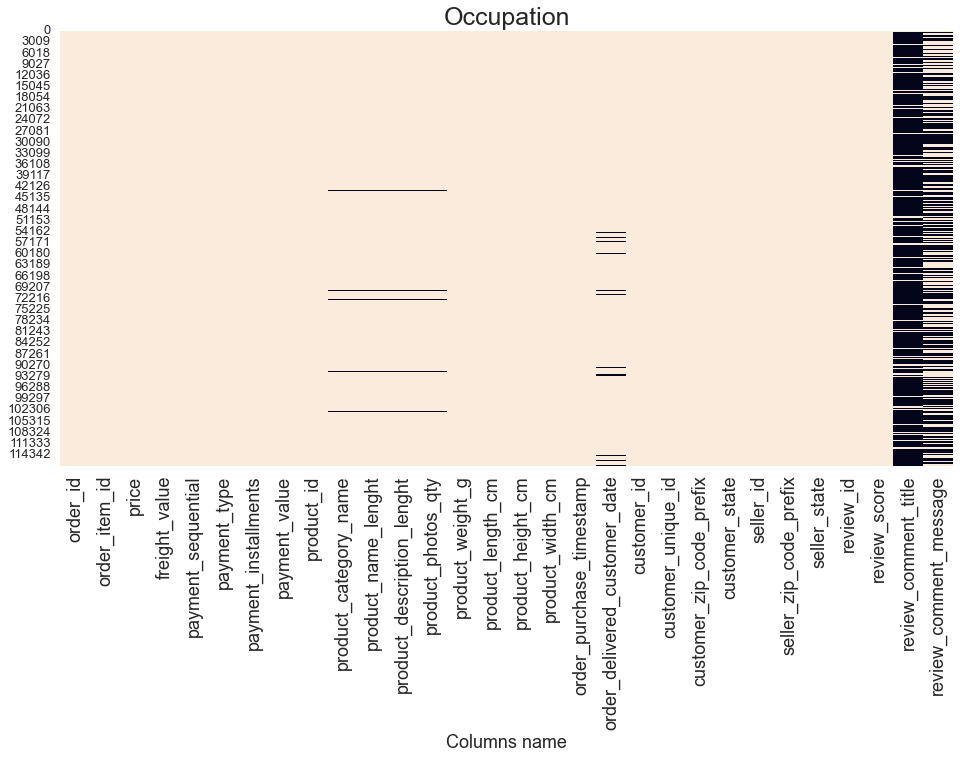

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,8))

# Plot heatmap of boolean cleaned dataframe
data_bin = ~financial_data.isnull()
sns.heatmap(data_bin, cbar=False, ax=axes)

axes.set_title("Occupation", fontdict = {
                             'fontsize': 25,
                            })
plt.xticks(size=18, rotation=90)
plt.xlabel('Columns name', fontsize=18)
plt.yticks(size=13)

In [7]:
# Fill nan value by mean for int/float columns containing Nan
column_to_put_mean = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
               'product_weight_g', 'product_weight_g', 'product_length_cm', 'product_height_cm',
               'product_width_cm']

for col in financial_data[column_to_put_mean].columns:
    financial_data[col].fillna(financial_data[col].mean(), inplace=True)

In [8]:
from datetime import datetime
from datetime import timedelta 

def object_to_datetime(_x):
    if pd.isnull(_x) == False: 
        return datetime.strptime(_x, '%Y-%m-%d %H:%M:%S')
    else:
        return np.nan

# Convert data string to datetime for date_columns
for col in date_columns:
    financial_data[col] = financial_data[col].apply(lambda x: object_to_datetime(x))
    
# Create delivery delay column
financial_data['delivery_delay'] = (financial_data['order_delivered_customer_date'] - \
                                 financial_data['order_purchase_timestamp']).apply(lambda x: x.days)

# Process delivery delay mean
delivery_delay_mean = int(financial_data['delivery_delay'].mean())

financial_data['delivery_delay'].fillna(delivery_delay_mean, inplace=True)

# Fill nan date in order_delivered_customer_date by order_purchase_timestamp date more delivery delay mean
financial_data['order_delivered_customer_date']\
        .fillna(financial_data['order_purchase_timestamp']+timedelta(days=delivery_delay_mean), inplace=True)

In [9]:
# Fill nan value in product_category_name by creating 'other' category
financial_data['product_category_name'].fillna('other', inplace=True)

In [10]:
# Save database
financial_data.to_csv('financial_data.csv', decimal=',', )

In [11]:
financial_data.columns

Index(['order_id', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_id', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_state', 'seller_id',
       'seller_zip_code_prefix', 'seller_state', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message', 'delivery_delay'],
      dtype='object')

# Orders-database creation

## Merge financial lines to have one line for one order

In [12]:
# Copy financial_data dataframe in orders_data
orders_data = pd.read_csv('financial_data.csv', decimal=',', index_col=0)

date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date']

def object_to_datetime(_x):
    if pd.isnull(_x) == False: 
        return datetime.strptime(_x, '%Y-%m-%d %H:%M:%S')
    else:
        return np.nan

# Convert data string to datetime for date_columns
for col in date_columns:
    orders_data[col] = orders_data[col].apply(lambda x: object_to_datetime(x))

### Payment type merge

In [13]:
## Expand payment_type columns
pay_type_data = pd.get_dummies(orders_data['payment_type'],prefix='pay_type')
pay_type_columns = pay_type_data.columns
pay_type_data = pay_type_data.join(orders_data['order_id'])
# create dataframe with payment_type sum by order 
pay_type_bool = pay_type_data.groupby(['order_id'])[pay_type_columns].sum()
# divide payment_type column by the number of payment types number for one order
pay_type_bool = pay_type_bool.apply(lambda x: x / x.sum(), axis=1)
# merge pay_type_bool with orders_data
orders_data = pd.merge(orders_data, pay_type_bool, on="order_id")
# DROP payment_type column
orders_data.drop(['payment_type'], axis=1, inplace=True)

### Product category merge

In [14]:
## Translate spanish categorical column to english
category_translation_df = pd.read_csv('archive/product_category_name_translation.csv', 
                        sep=',', 
                        index_col='product_category_name') 

def lookup(_x):
    if pd.notnull(_x) and _x in category_translation_df['product_category_name_english']:
        return category_translation_df.loc[_x, 'product_category_name_english']
    else:
        return _x

orders_data['product_category_name_english'] = orders_data['product_category_name'].apply(
                                lambda x: lookup(x))

orders_data.drop(['product_category_name'], axis=1, inplace=True)

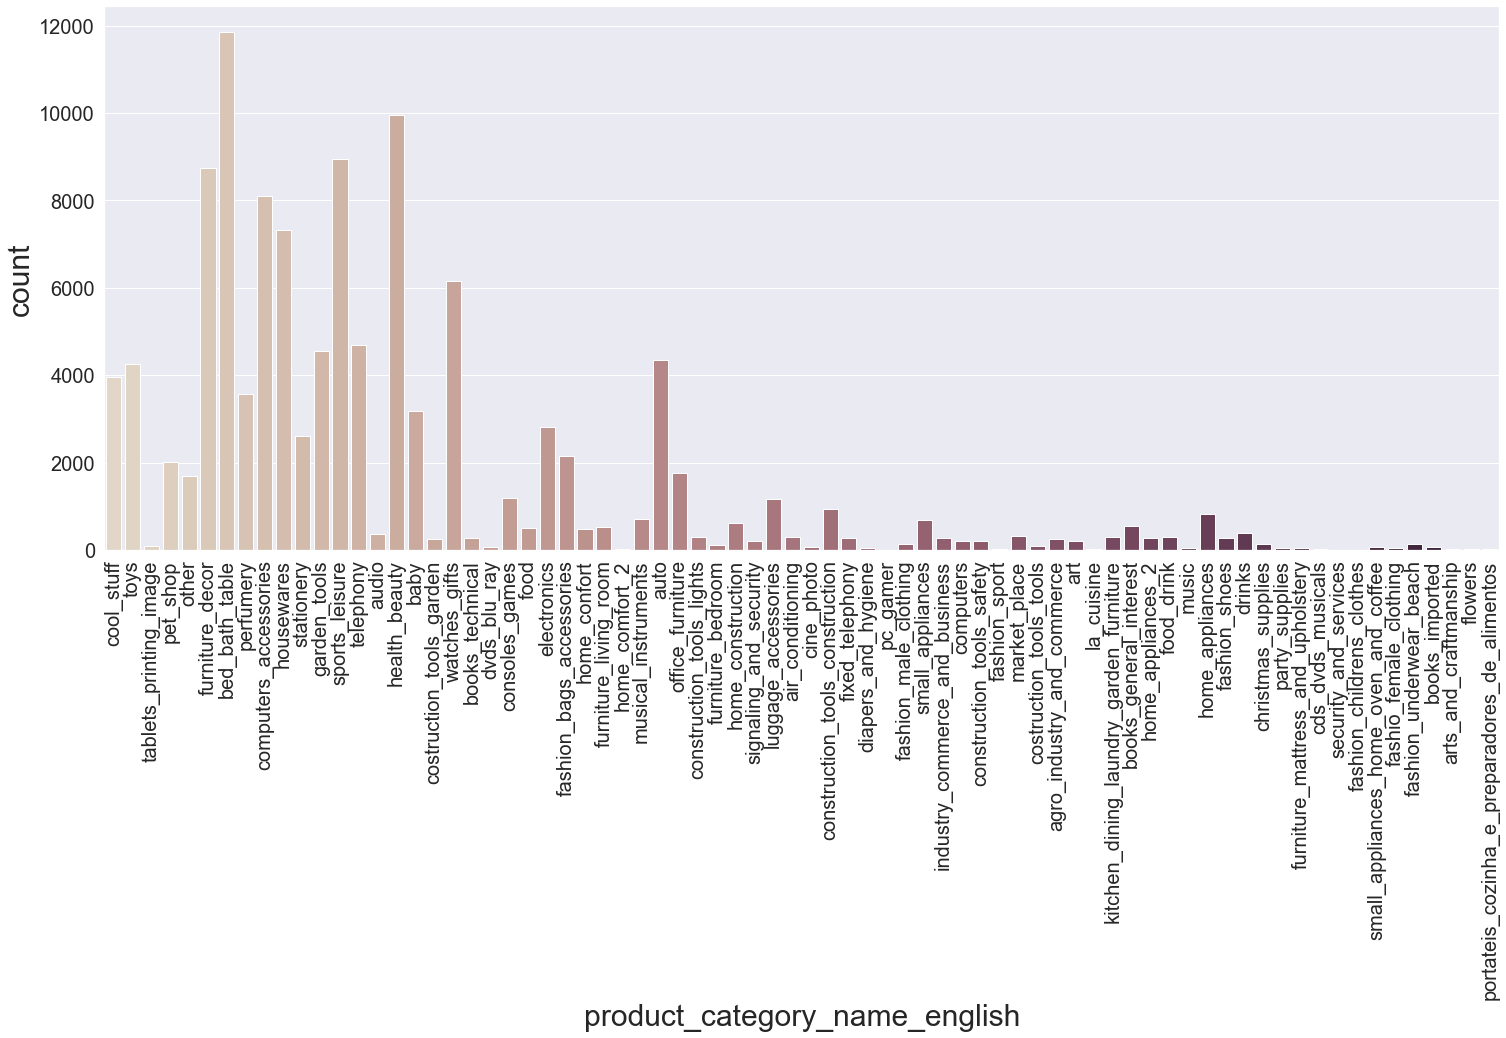

In [15]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(ax=ax, x='product_category_name_english', palette='ch:.25', data=orders_data)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

In [16]:
# Change category name for categories with less than 2000 items in database
cat_to_other = orders_data['product_category_name_english'].value_counts().loc[lambda x : x<2000].index
orders_data.loc[orders_data['product_category_name_english'].isin(cat_to_other),\
                'product_category_name_english'] = 'other'

print('transform', len(cat_to_other), 'categories in other')

transform 56 categories in other


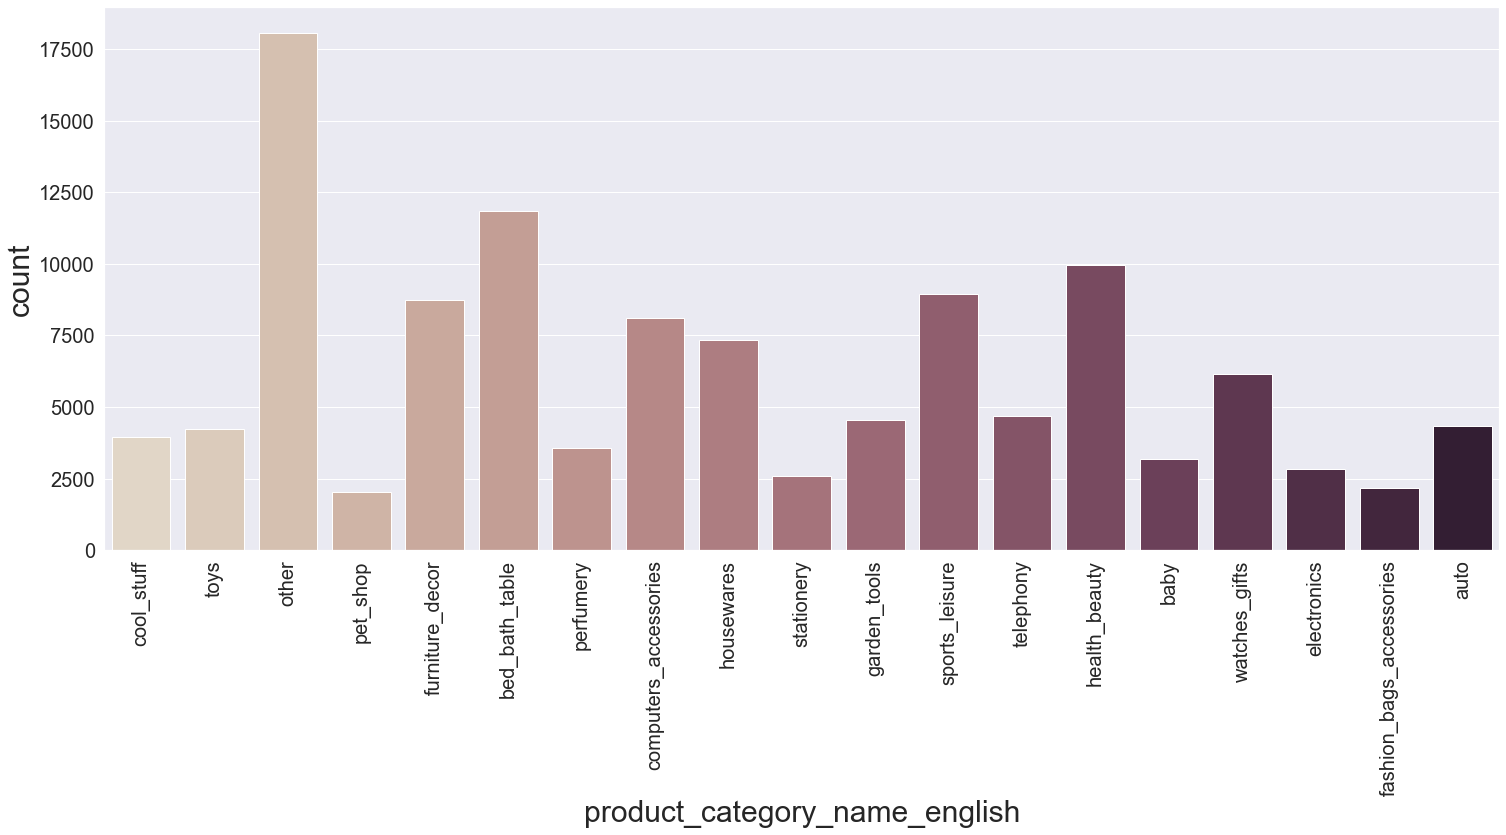

In [17]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(ax=ax, x='product_category_name_english', palette='ch:.25', data=orders_data)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

In [18]:
## Expand product_category columns
prod_cat_data = pd.get_dummies(orders_data['product_category_name_english'], prefix='prod_cat')
prod_cat_columns = prod_cat_data.columns

prod_cat_data = prod_cat_data.join(orders_data['order_id'])
# create dataframe with product_category sum by order 
prod_cat_bool = prod_cat_data.groupby(['order_id'])[prod_cat_columns].sum()
# divide product_category column by the number of product category number for one order
prod_cat_bool = prod_cat_bool.apply(lambda x: x / x.sum(), axis=1)
# merge prod_cat_bool with orders_data
orders_data = pd.merge(orders_data, prod_cat_bool, on="order_id")
# DROP payment_type column
orders_data.drop(['product_category_name_english'], axis=1, inplace=True)

### Payment value and payment sequential merge

In [19]:
# PAYMENT SEQUENTIAL
# Create payments sequential column dataset
payments_sequential = orders_data.groupby(['order_id'])['payment_sequential'].max()
# Merge payments_sequential with orders_data using order_id key
orders_data = pd.merge(orders_data, payments_sequential, on="order_id")

# PAYMENT VALUE
# Create payment value sum for unique order_id
orders_value_sum = orders_data.groupby(['order_id'])['payment_value'].sum()
# Merge orders_value_sum with orders_data using order_id key
orders_data = pd.merge(orders_data, orders_value_sum, on="order_id")
# Create global_payment_value column merging payment_value_x and payment_value_y
orders_data['payment_value'] = orders_data.apply(\
    lambda x: x['payment_value_y'] if x['payment_sequential_y']>1 else x['payment_value_x'], axis = 1)
# DROP temp columns
orders_data.drop(['payment_value_x', 'payment_value_y'], axis=1, inplace=True)

### Product columns merge

In [20]:
product_str_cols = ['product_id']
product_size_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
product_des_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
    
product_data = []
for col in product_str_cols:
    groupDF = orders_data.groupby(['order_id'])[col].apply(lambda x: ','.join(x.astype(str)))
    orders_data = pd.merge(orders_data, groupDF, on="order_id")
    orders_data[col] = orders_data.apply(\
        lambda x: x[col+'_x'] if x['payment_sequential_y']>1 else x[col+'_y'], axis = 1)
    # DROP temp columns
    orders_data.drop([col+'_x', col+'_y'], axis=1, inplace=True)
    
for col in product_size_cols+product_des_cols:
    groupDF = orders_data.groupby(['order_id'])[col].mean()
    orders_data = pd.merge(orders_data, groupDF, on="order_id")
    orders_data[col] = orders_data.apply(\
        lambda x: x[col+'_x'] if x['payment_sequential_y']>1 else x[col+'_y'], axis = 1)
    # DROP temp columns
    orders_data.drop([col+'_x', col+'_y'], axis=1, inplace=True)

In [21]:
# DROP payment_sequential original columns and rename new columns as the old ones
orders_data.drop(['payment_sequential_x'], axis=1, inplace=True)
orders_data.rename(columns={'payment_sequential_y':'payment_sequential'}, inplace=True)

### Items number, price, freight value merge

In [22]:
# ITEMS NUMBER
# Create items number column dataset
items_number = orders_data.groupby(['order_id'])['order_item_id'].max()
# Merge items_number_col with orders_data using order_id key
orders_data = pd.merge(orders_data, items_number, on="order_id")

# PRICE AND FREIGHT
payment_cols = ['price', 'freight_value']
for col in payment_cols:
    # Create column sum for unique order_id
    column_sum = orders_data.groupby(['order_id'])[col].sum()
    # Merge column with orders_data using order_id key
    orders_data = pd.merge(orders_data, column_sum, on="order_id")
    # Create global column merging old and new column
    orders_data[col] = orders_data.apply(\
        lambda x: x[col+'_y'] if x['order_item_id_y']>1 else x[col+'_x'], axis = 1)
    # DROP temp columns
    orders_data.drop([col+'_x', col+'_y'], axis=1, inplace=True)

# DROP order_item original columns and rename new columns as the old ones
orders_data.drop(['order_item_id_x'], axis=1, inplace=True)
orders_data.rename(columns={'order_item_id_y':'order_item_id'}, inplace=True)

### Drop duplicated order_id lines to transform financial lines in orders database

In [23]:
# DROP duplicated rows to obtain the orders database
orders_data.drop_duplicates(subset='order_id', keep='first', inplace=True)

## Process distance between customer and seller for each order

In [24]:
# Load geolocalisation dataframe
geoloc_df = pd.read_csv('archive/olist_geolocation_dataset.csv', sep=',') 

# For same zip code prefix, process geolocalisation mean 
geoloc_df = \
    pd.DataFrame(
                {
                    'geolocation_lat':
                    geoloc_df.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean(),
                    'geolocation_lng':
                    geoloc_df.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean()
                }
)

In [25]:
from geopy.distance import distance

# Function to process distance between customer and seller for an order row 
def get_distance(_row):
    customer_geoloc = (np.nan, np.nan)
    seller_geoloc = (np.nan, np.nan)
    try:
        geo_row = geoloc_df.loc[_row['customer_zip_code_prefix']]
        customer_geoloc = (geo_row['geolocation_lat'],
                           geo_row['geolocation_lng'])
        geo_row = geoloc_df.loc[_row['seller_zip_code_prefix']]
        seller_geoloc = (geo_row['geolocation_lat'],
                         geo_row['geolocation_lng'])
        return float(str(distance(customer_geoloc, seller_geoloc))[:-3])
    except:
        return np.nan

# Process distance between customer and seller for an order row
orders_data['dist_to_seller'] = orders_data.apply(lambda row: get_distance(row), axis=1)

# Put mean distance for orders which distance customer seller is not processed 
orders_data.loc[orders_data['dist_to_seller'].isna(),'dist_to_seller'] = orders_data['dist_to_seller'].mean()

## Create column to evaluate comment propensity

In [26]:
# Create column to evaluate comment propensity
orders_data['comment_propensity'] = \
    orders_data['review_comment_title'].fillna(0).str.split().str.len().fillna(0) + \
    orders_data['review_comment_message'].fillna(0).str.split().str.len().fillna(0) 

## Create columns that describe order week day, moment of day, delivery delay

In [27]:
## ORDER WEEK DAY
    
# Create order day of week column from purchase datetime 
orders_data['order_week_day'] = orders_data['order_purchase_timestamp'].apply(lambda x: x.weekday())

In [28]:
## ORDER MOMENT OF DAY

def datatime_to_momentofday(_datetime):
    if _datetime.hour in range(6):
        return 0
    elif _datetime.hour in range(6,12):
        return 1
    elif _datetime.hour in range(12,18):
        return 2
    elif _datetime.hour in range(18,24):
        return 3
    else:
        return -1

# Create order moment of day column from purchase datetime 
orders_data['moment_of_day'] = orders_data['order_purchase_timestamp'].apply(
                                                    lambda x: datatime_to_momentofday(x))

In [29]:
orders_data.to_csv('orders_data.csv', decimal=',')

# Customer database creation

In [30]:
from datetime import datetime

# Copy financial_data dataframe in orders_data
customers_data = pd.read_csv('orders_data.csv', decimal=',', index_col=0)

date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date']

def object_to_datetime(_x):
    if pd.isnull(_x) == False: 
        return datetime.strptime(_x, '%Y-%m-%d %H:%M:%S')
    else:
        return np.nan

# Convert data string to datetime for date_columns
for col in date_columns:
    customers_data[col] = customers_data[col].apply(lambda x: object_to_datetime(x))

## Mean order parameters by customer 

In [31]:
columns_to_average = ['review_score', 'order_item_id', 'payment_sequential', 'price', 
                      'dist_to_seller', 'comment_propensity', 'payment_installments', 
                      'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 
                      'product_width_cm', 'product_name_lenght', 'product_description_lenght', 
                      'product_photos_qty', 'freight_value', 'order_week_day', 'moment_of_day', 
                      'delivery_delay',]
    
mean_dataframe_list = []
for column in columns_to_average:
    # create mean dataframe
    mean_dataframe_list.append(customers_data.groupby(['customer_unique_id'])[column].mean())

# concatanate these dataframes together 
mean_df = pd.concat(mean_dataframe_list, axis=1)
# merge mean_df with customers_data
customers_data = pd.merge(customers_data, mean_df, on="customer_unique_id")

# drop temp columns
columns_to_average_x = [s + '_x' for s in columns_to_average]
customers_data.drop(columns_to_average_x, axis=1, inplace = True)

# rename averaged columns
columns_to_average_y = [s + '_y' for s in columns_to_average]
columns_to_average_mean = [s for s in columns_to_average]
columns_to_average_rename_dict = dict(zip(columns_to_average_y, columns_to_average_mean))
customers_data.rename(columns=columns_to_average_rename_dict, inplace=True)

In [32]:
# create custumer order nb dataframe
custumer_order_nb = customers_data.groupby(['customer_unique_id']).count()['order_id']

# merge custumer_order_nb with customers_data
customers_data = pd.merge(customers_data, custumer_order_nb, on="customer_unique_id")

# drop temp columns
customers_data.drop('order_id_x', axis=1, inplace = True)

# rename averaged columns
customers_data.rename(columns={'order_id_y':'order_id'}, inplace=True)

In [33]:
# create dataframe with sum of categories by customer
prod_cat_df = customers_data.groupby('customer_unique_id')[prod_cat_columns].sum()
# divide prod_cat_df column by the number of product category number for one customer
prod_cat_df = prod_cat_df.apply(lambda x: x / x.sum(), axis=1)
# merge prod_cat_df with customers_data
customers_data = pd.merge(customers_data, prod_cat_df, on="customer_unique_id")

prod_cat_columns_x = [s + '_x' for s in prod_cat_columns]
prod_cat_columns_y = [s + '_y' for s in prod_cat_columns]
prod_cat_to_rename_dict = dict(zip(prod_cat_columns_y, prod_cat_columns))

customers_data.drop(prod_cat_columns_x, axis=1, inplace = True)
customers_data.rename(columns=prod_cat_to_rename_dict, inplace=True)

## Create column to describe time since last order

In [34]:
customers_data['last_purchase_days'] = customers_data['order_purchase_timestamp'].apply(
                                                lambda x: (datetime.today()-x).days)

# Create since last purchase days number dataset
last_purchase_days = customers_data.groupby(['customer_unique_id'])['last_purchase_days'].min()
# Merge last_purchase_days with customers_data using order_id key
customers_data = pd.merge(customers_data, last_purchase_days, on="customer_unique_id")

# drop temp columns
customers_data.drop('last_purchase_days_x', axis=1, inplace = True)

# rename averaged columns
customers_data.rename(columns={'last_purchase_days_y':'last_purchase_days'}, inplace=True)

## DROP duplicated rows to obtain the orders database

In [35]:
customers_data.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)

## Customer state visu

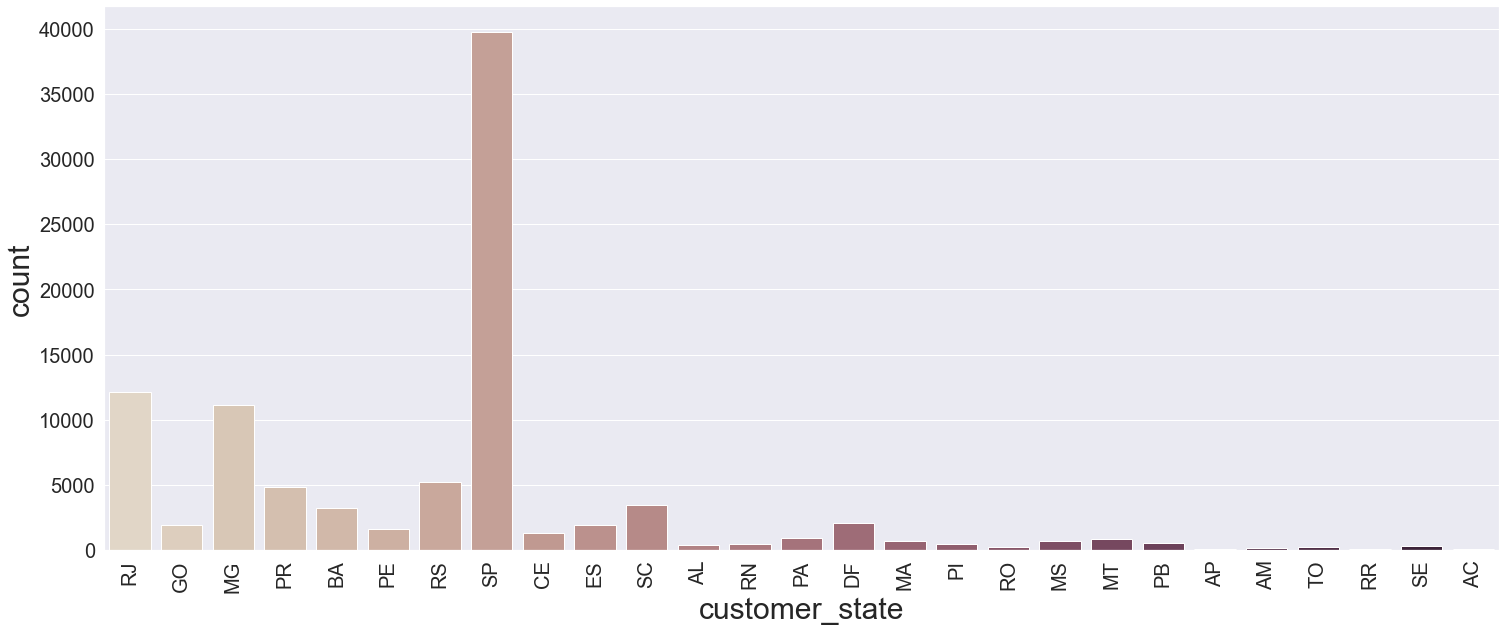

In [36]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(ax=ax, x='customer_state', palette='ch:.25', data=customers_data)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

In [37]:
# Change state name for states with less than 2000 customers in database
states_to_other = customers_data['customer_state'].value_counts().loc[lambda x : x<2000].index
customers_data.loc[customers_data['customer_state'].isin(states_to_other),\
                'customer_state'] = 'other'

print('transform', len(states_to_other), 'states in other')

transform 19 states in other


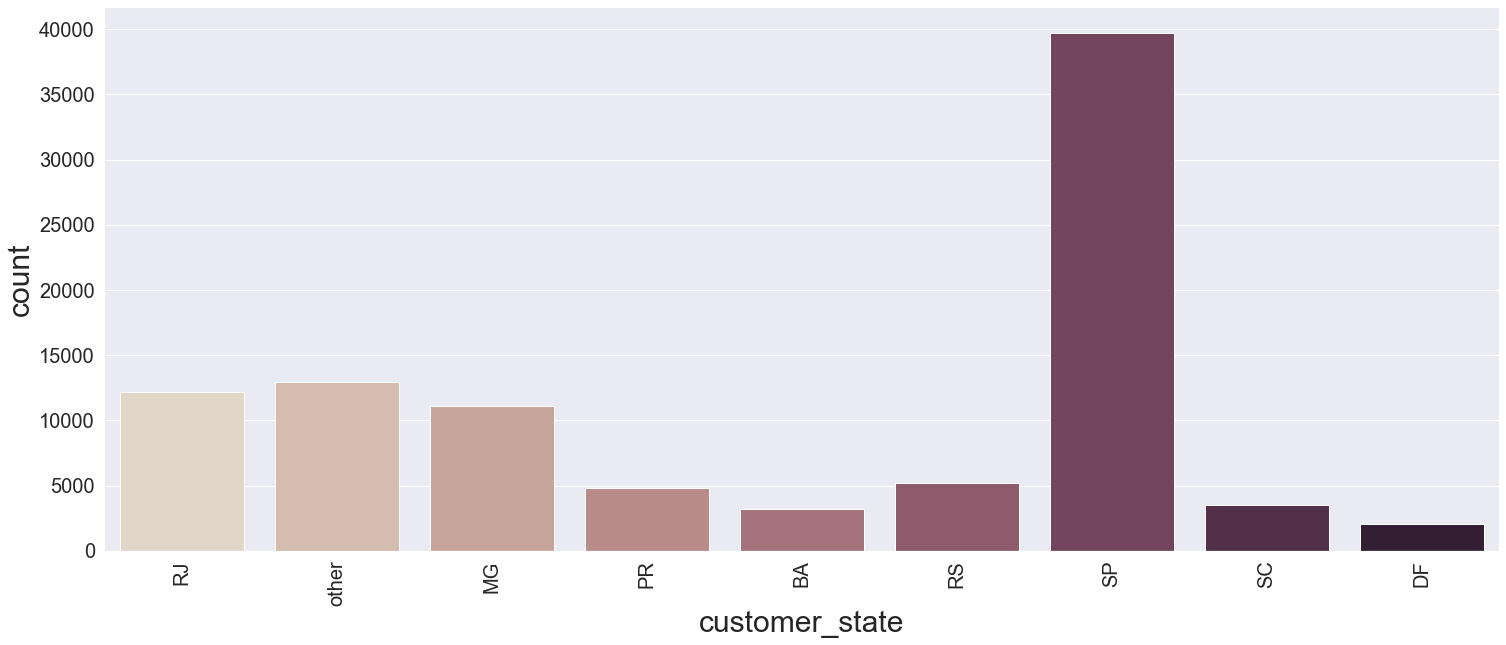

In [38]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(ax=ax, x='customer_state', palette='ch:.25', data=customers_data)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
ax.xaxis.label.set_size(30)
ax.yaxis.label.set_size(30)

## Expand customer state column

In [39]:
customers_data = customers_data.join(pd.get_dummies(customers_data['customer_state'], prefix='state'))

## Delete useless columns

In [40]:
customers_data.drop(['product_id',
                     'customer_unique_id',
                     'customer_zip_code_prefix', 
                     'customer_state', 'seller_id', 'seller_zip_code_prefix', 
                     'seller_state','review_id', 'review_comment_title', 
                     'review_comment_message',
                     'order_delivered_customer_date', 'customer_id',], 
                    axis=1, inplace=True)

In [41]:
customers_data.reset_index(inplace=True)
customers_data.drop(['index'], axis=1, inplace=True)
customers_data.to_csv('customers_data.csv', decimal=',')

In [42]:
customers_data.columns

Index(['order_purchase_timestamp', 'pay_type_boleto', 'pay_type_credit_card',
       'pay_type_debit_card', 'pay_type_voucher', 'review_score',
       'order_item_id', 'payment_sequential', 'price', 'dist_to_seller',
       'comment_propensity', 'payment_installments', 'payment_value',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'freight_value', 'order_week_day',
       'moment_of_day', 'delivery_delay', 'order_id', 'prod_cat_auto',
       'prod_cat_baby', 'prod_cat_bed_bath_table',
       'prod_cat_computers_accessories', 'prod_cat_cool_stuff',
       'prod_cat_electronics', 'prod_cat_fashion_bags_accessories',
       'prod_cat_furniture_decor', 'prod_cat_garden_tools',
       'prod_cat_health_beauty', 'prod_cat_housewares', 'prod_cat_other',
       'prod_cat_perfumery', 'prod_cat_pet_shop', 'prod_cat_sports_leisure',
       'prod_cat_stationery', 'prod